### Which UCLs consistently meet or fail to meet the 85% or 90% response time targets for Code 1 incidents?

In [63]:
# Import dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

In [65]:
# Load the Data files
ambulance_2018 = Path("Data/ambulance2018.csv")
ambulance_2019 = Path("Data/ambulance2019.csv")

In [67]:
# Convert to dataframes
ambulance_data_2018 = pd.read_csv(ambulance_2018)
ambulance_data_2019 = pd.read_csv(ambulance_2019)

In [69]:
# Cleaning and formatting the 'ambulance_data_2018' and 'ambulance_data_2019' datasets for analysis
# Removing '%' and converting the 'percentage <= 15 minutes' columns to numeric for comparison.

ambulance_data_2018['%<=15mins'] = ambulance_data_2018['%<=15mins'].str.replace('%', '').astype(float)
ambulance_data_2019['%<=15mins'] = ambulance_data_2019['%<=15mins'].str.replace('%', '').astype(float)

# Combining the 2018 and 2019 
combined_data = pd.concat([ambulance_data_2018[['UCL Name', '%<=15mins']],
                           ambulance_data_2019[['UCL Name', '%<=15mins']]], 
                          keys=['2018', '2019'], names=['Year']).reset_index()
combined_data.head(10)

,Year,level_1,UCL Name,%<=15mins
0,2018,0,Albury - Wodonga (Wodonga Part),91.35
1,2018,1,Bacchus Marsh,79.85
2,2018,2,Bairnsdale,85.61
3,2018,3,Ballarat,89.32
4,2018,4,Benalla,84.08
5,2018,5,Bendigo,86.25
6,2018,6,Castlemaine,71.43
7,2018,7,Colac,85.37
8,2018,8,Drouin,75.00
9,2018,9,Drysdale - Clifton Springs,82.38


In [72]:
# Calculating the mean response time performance across the two years

mean_performance = combined_data.groupby('UCL Name')['%<=15mins'].mean().reset_index()
mean_performance.head(10)

,UCL Name,%<=15mins
0,Albury - Wodonga (Wodonga Part),91.125
1,Bacchus Marsh,81.625
2,Bairnsdale,84.855
3,Ballarat,90.260
4,Benalla,80.240
5,Bendigo,86.825
6,Castlemaine,72.215
7,Colac,85.785
8,Drouin,79.950
9,Drysdale - Clifton Springs,83.540


In [74]:
# Identifying UCLs that meet or fail the 85% and 90% targets
mean_performance['Performance'] = mean_performance['%<=15mins'].apply(
    lambda x: 'Meet 90% Target' if x >= 90 else ('Fail 85% Target' if x < 85 else 'Between 85%-90%')
)

# Counting the number of UCLs that meet the 90%, fail the 85%, or fall in between

performance_counts = mean_performance['Performance'].value_counts()

In [76]:
# Displaying the first few rows of the performance table for review
mean_performance.head()

,UCL Name,%<=15mins,Performance
0,Albury - Wodonga (Wodonga Part),91.125,Meet 90% Target
1,Bacchus Marsh,81.625,Fail 85% Target
2,Bairnsdale,84.855,Fail 85% Target
3,Ballarat,90.260,Meet 90% Target
4,Benalla,80.240,Fail 85% Target


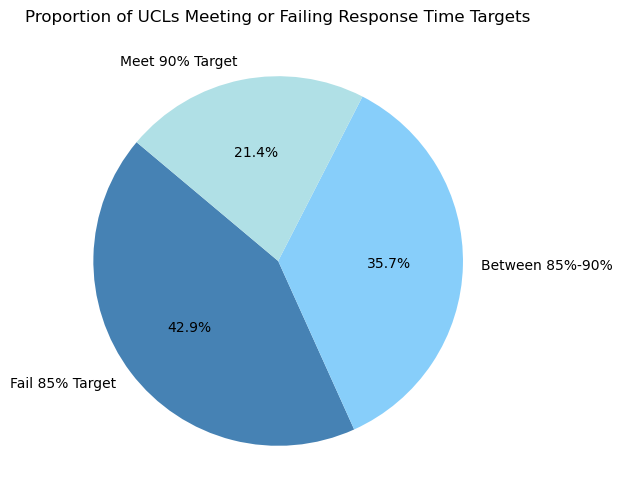

In [89]:
# Pie chart visualization
plt.figure(figsize=(8, 6))
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%', startangle=140, colors=['#4682b4', '#87cefa', '#b0e0e6'])
plt.title('Proportion of UCLs Meeting or Failing Response Time Targets')
plt.savefig("Data/TotalNumber.png")
plt.show()

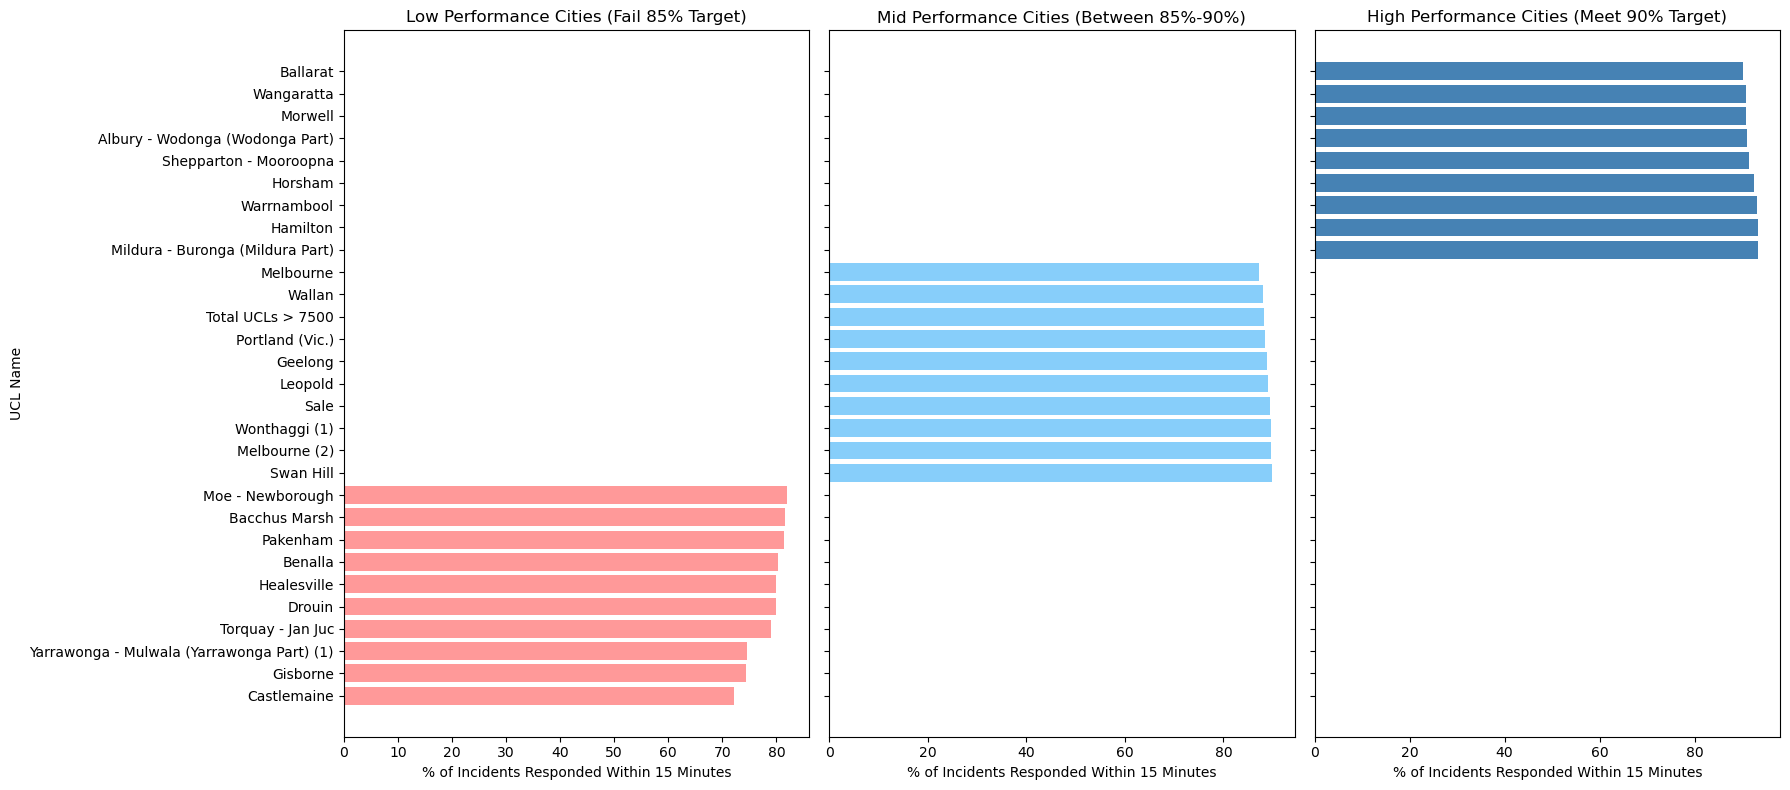

In [113]:
# Creating the figure and subplots for three categories 
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

# Plotting low-performance UCLs (Fail 85% Target) 
axes[0].barh(low_performance['UCL Name'], low_performance['%<=15mins'], color='#ff9999')
axes[0].set_title('Low Performance Cities (Fail 85% Target)')
axes[0].set_xlabel('% of Incidents Responded Within 15 Minutes')
axes[0].set_ylabel('UCL Name')

# Plotting mid-performance UCLs (Between 85%-90%) 
axes[1].barh(mid_performance['UCL Name'], mid_performance['%<=15mins'], color='#87cefa')
axes[1].set_title('Mid Performance Cities (Between 85%-90%)')
axes[1].set_xlabel('% of Incidents Responded Within 15 Minutes')

# Plotting high-performance UCLs (Meet 90% Target) 
axes[2].barh(high_performance['UCL Name'], high_performance['%<=15mins'], color='#4682b4')
axes[2].set_title('High Performance Cities (Meet 90% Target)')
axes[2].set_xlabel('% of Incidents Responded Within 15 Minutes')

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.savefig("Data/TotalNumber_cities.png")
plt.show()

#### Based on the analysis of ambulance response times across different UCLs (Urban Centres and Localities), we identified key trends in meeting the 85% and 90% response time targets for Code 1 incidents. A significant number of UCLs fall into the "Between 85%-90%" category, indicating that while they are relatively close to meeting the 90% target, there is still room for improvement. UCLs that meet the 90% target show strong performance, with efficient emergency response systems likely due to better infrastructure or resource allocation. Conversely, UCLs that consistently fail to meet the 85% target likely face challenges such as traffic congestion, limited ambulance availability, or greater distances to travel, particularly in rural or less populated areas. 